<h1>ANN regression example</h1>

In [1]:
# importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
import warnings
warnings.filterwarnings("ignore")

In [42]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

<h3>Data Handling</h3>

In [61]:
# Laoding the data into pandas dataframe
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,0,0,...,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0,0,...,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0,0,...,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0,0,...,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0,0,...,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503


In [43]:
print("The shape of the dataset: ", df.shape)
print("The number of missing values present in the dataset: ", df.isna().sum().sum())
df.describe().transpose()

The shape of the dataset:  (21597, 21)
The number of missing values present in the dataset:  0


,count,mean,std,min,25%,50%,75%,max
id,21597.000,4580474287.771,2876735715.748,1000102.000,2123049175.000,3904930410.000,7308900490.000,9900000190.000
price,21597.000,540296.574,367368.140,78000.000,322000.000,450000.000,645000.000,7700000.000
bedrooms,21597.000,3.373,0.926,1.000,3.000,3.000,4.000,33.000
bathrooms,21597.000,2.116,0.769,0.500,1.750,2.250,2.500,8.000
sqft_living,21597.000,2080.322,918.106,370.000,1430.000,1910.000,2550.000,13540.000
sqft_lot,21597.000,15099.409,41412.637,520.000,5040.000,7618.000,10685.000,1651359.000
floors,21597.000,1.494,0.540,1.000,1.000,1.500,2.000,3.500
waterfront,21597.000,0.008,0.087,0.000,0.000,0.000,0.000,1.000
view,21597.000,0.234,0.766,0.000,0.000,0.000,0.000,4.000
condition,21597.000,3.410,0.651,1.000,3.000,3.000,4.000,5.000


<h3>Exploratory Data Analysis</h3>

To see the distribution of the target variable - price (Uni-variate analysis)

<AxesSubplot:xlabel='price', ylabel='Density'>

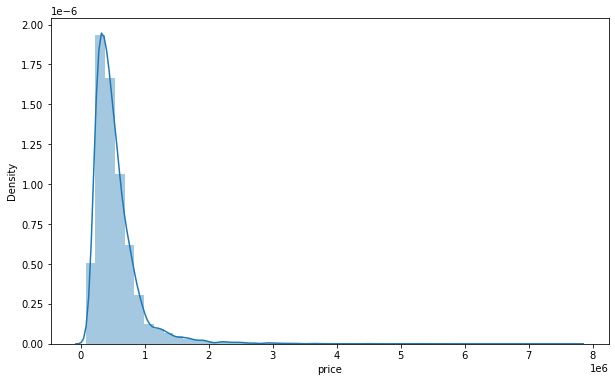

In [44]:
plt.figure(figsize=(10,6))
sns.distplot(df['price'])   # to see the distribution of the continuous data

        We see that, the majority of the price is located in the range of 1 to 3 million

To see how the number of bedrooms in the house  (Univariate analysis)

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

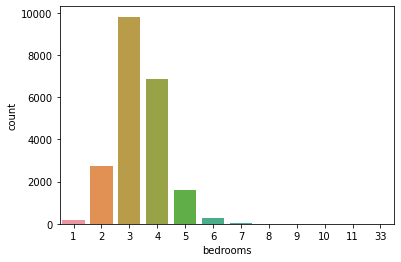

In [18]:
sns.countplot(df['bedrooms'])

    Majority of the houses have 3 or 4 bedrooms, there are few outliers, where the house has 33 bedrooms

To see the correaltion of the features with respect to the price (Multi-variate analysis)

In [19]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

    So, based of this we try to explore the high correlated features with the price, using scatterplot

Scatterplot of sqft_living against price (Bi-variate analysis)

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

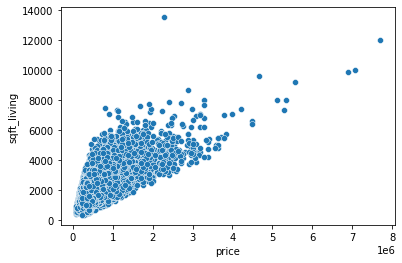

In [45]:
sns.scatterplot(x='price',y='sqft_living',data=df)

    The plot looks very much linear to both variables except the few outliers

Barplot of bedrooms vs price (Bi-variate analysis)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

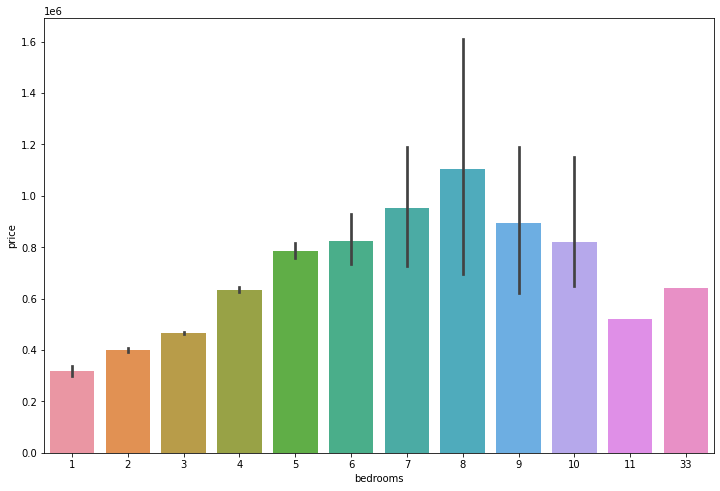

In [46]:
plt.figure(figsize=(12,8))
sns.barplot(x='bedrooms',y='price',data=df)

    We see that there is not exacly a linear relationship between the price and the number of bedrooms

Trend of longitude co-ordinates against price (Bi-variate analysis)

<AxesSubplot:xlabel='price', ylabel='long'>

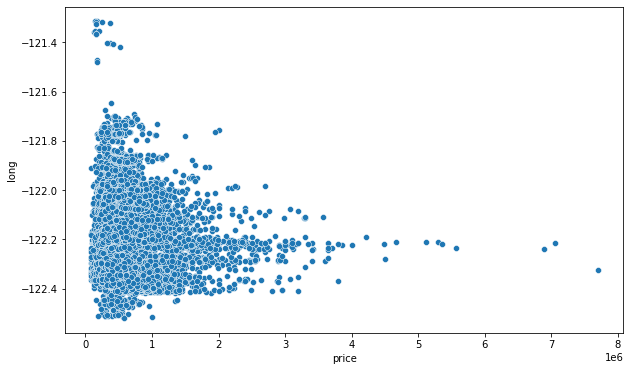

In [47]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='price',y='long',data=df)     # longitude

    There is a sort of price distribution at a certain longitude, around -122.2 to 122.4

Trend of price against the latitude co-ordinates (Bi-variate analysis)

<AxesSubplot:xlabel='price', ylabel='lat'>

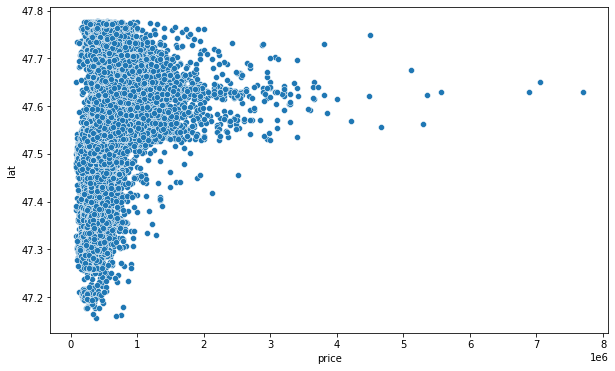

In [35]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='price',y='lat',data=df)     # longitude

    Similarly, we at certain latitudes the houses are priced higher

Geographical Analysis

    We saw the previous plots, which means that, at certain combination of latitude and longitude, there tends to be an expensive houses

<AxesSubplot:xlabel='long', ylabel='lat'>

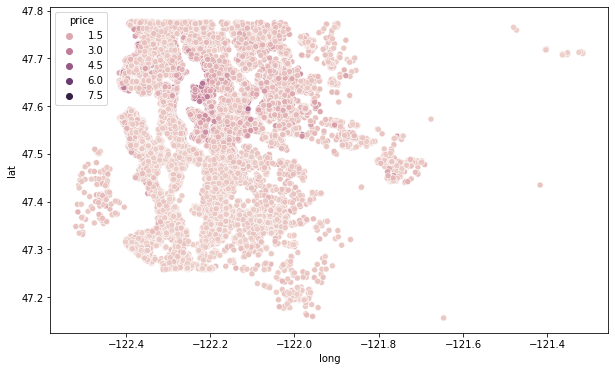

In [48]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='long',y='lat',data=df, hue=df['price'])   # plot of the map

# since we had few outliers, we remove them and shall see for majority of the data

In [49]:
# top 20 expensive houses
df.sort_values('price',ascending=False)[:20]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.000,6,8.000,12050,27600,2.500,0,3,...,13,8570,3480,1910,1987,98102,47.630,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.000,5,4.500,10040,37325,2.000,1,2,...,11,7680,2360,1940,2001,98004,47.650,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.000,6,7.750,9890,31374,2.000,0,4,...,13,8860,1030,2001,0,98039,47.630,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.000,5,5.750,9200,35069,2.000,0,0,...,13,6200,3000,2001,0,98039,47.629,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.000,5,5.000,8000,23985,2.000,0,4,...,12,6720,1280,2009,0,98004,47.623,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.000,6,6.000,7390,24829,2.000,1,4,...,12,5000,2390,1991,0,98040,47.563,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.000,5,5.250,8010,45517,2.000,1,4,...,12,5990,2020,1999,0,98033,47.677,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.000,5,6.750,9640,13068,1.000,1,4,...,12,4820,4820,1983,2009,98040,47.557,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.000,5,5.500,6640,40014,2.000,1,4,...,12,6350,290,2004,0,98155,47.749,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.000,4,3.000,6430,27517,2.000,0,0,...,12,6430,0,2001,0,98004,47.621,-122.219,3720,14592


In [50]:
len(df)*0.01

215.97

In [51]:
# dropping 1% of the data that will be the most expensive houses
non_top_houses = df.sort_values('price',ascending=False).iloc[216:]
non_top_houses[:5]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6329,824059321,6/2/2014,1970000.000,4,3.500,4370,8510,2.000,0,1,...,10,3610,760,2003,0,98004,47.588,-122.204,2960,10347
12271,1923000260,10/15/2014,1960000.000,5,4.500,6200,23373,3.000,0,1,...,11,5050,1150,1988,0,98040,47.563,-122.215,3700,14486
9166,3124059023,2/13/2015,1960000.000,3,1.750,3330,12566,1.000,1,4,...,8,1940,1390,1960,0,98040,47.529,-122.220,3730,16560
12565,2806300065,4/22/2015,1960000.000,4,4.000,4430,31353,2.000,0,0,...,12,4430,0,1998,0,98005,47.642,-122.157,3900,35237
1150,4055701200,4/21/2015,1960000.000,4,2.750,3120,7898,1.000,1,4,...,8,1560,1560,1963,0,98034,47.717,-122.259,2630,13868


<AxesSubplot:xlabel='long', ylabel='lat'>

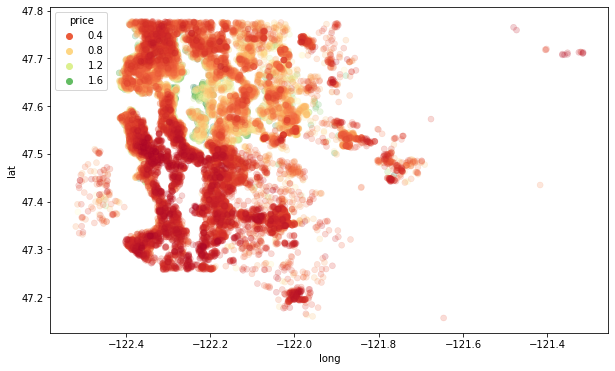

In [56]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='long',y='lat',data=non_top_houses, hue='price', edgecolor=None, alpha=0.2, palette='RdYlGn')   # plot of the map

    We observe that, the prices of the houses are mostly costlier near the waterfront than the bay area

To confirm that the houses are expensive around the waterfront (Bi-variate analysis)

<AxesSubplot:xlabel='waterfront', ylabel='price'>

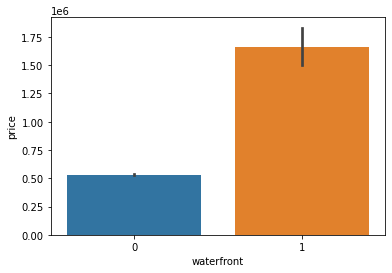

In [57]:
sns.barplot(x='waterfront',y='price',data=df)

    we can conclude that, if the houses are waterfront, means they are likely to be expensive than others

<h3>Feature Engineering</h3>

In [58]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,0,0,...,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0,0,...,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0,0,...,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0,0,...,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0,0,...,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503


In [62]:
# dropping the feature id
df = df.drop('id',axis=1)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,2/25/2015,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
3,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000
4,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503


In [66]:
df['date'].dtype

dtype('O')

    We can see that the feature date is of the type object, but if it was the type datetime we could use that feature a lot better. So we convert the type of the date feature from object to datetime

In [68]:
df['date'] = pd.to_datetime(df['date'])

In [70]:
df['date'].dtype    # now it is of the type datetime

dtype('<M8[ns]')

- Make new features year and month from the date feature, as it will be more helpful
- These are some of the data which were hidden inside the dataset we had, hence feature engineering is necessary

In [73]:
df['year'] = df['date'].apply(lambda x: x.year)
df['month'] = df['date'].apply(lambda x: x.month)
df[:5]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.000,3,1.000,1180,5650,1.000,0,0,3,...,0,1955,0,98178,47.511,-122.257,1340,5650,2014,10
1,2014-12-09,538000.000,3,2.250,2570,7242,2.000,0,0,3,...,400,1951,1991,98125,47.721,-122.319,1690,7639,2014,12
2,2015-02-25,180000.000,2,1.000,770,10000,1.000,0,0,3,...,0,1933,0,98028,47.738,-122.233,2720,8062,2015,2
3,2014-12-09,604000.000,4,3.000,1960,5000,1.000,0,0,5,...,910,1965,0,98136,47.521,-122.393,1360,5000,2014,12
4,2015-02-18,510000.000,3,2.000,1680,8080,1.000,0,0,3,...,0,1987,0,98074,47.617,-122.045,1800,7503,2015,2


Bi-variate analysis of month and year features with respect to price

<AxesSubplot:xlabel='month', ylabel='price'>

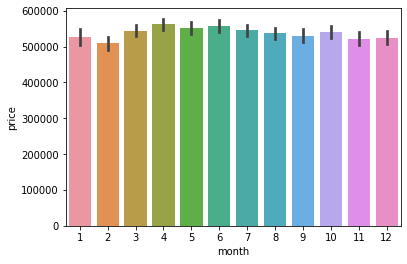

In [74]:
sns.barplot(x='month',y='price',data=df)

    We observe that there isn't any particular trend in the house prices based off the month, most of the months have almost the similar price range

<AxesSubplot:xlabel='month'>

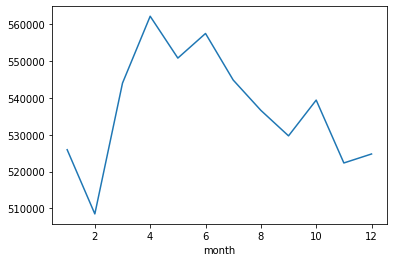

In [76]:
df.groupby('month').mean()['price'].plot()

<AxesSubplot:xlabel='year'>

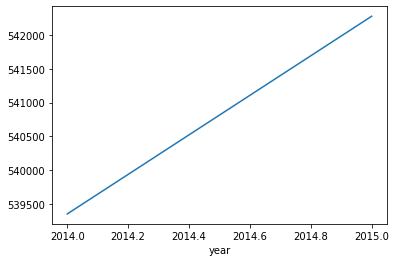

In [77]:
df.groupby('year').mean()['price'].plot()

    We observe that there is a increase in the price of the houses gradually and linearly w.r.t years

In [78]:
df = df.drop('date',axis=1)

- The feature zip code, the model treats it as a numerical column, which shouldn't actually be, because they represent the location just like latitude and longitude
- means, if it's numerical it will get involved with calculations of the model just like other features
- So, we can either categorise it or drop the entire feature

In [79]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

- Since we have 70 unique categories, it will be difficult to label encode or one hot encode them
- So, we shall drop the feature

In [80]:
df = df.drop('zipcode',axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,47.511,-122.257,1340,5650,2014,10
1,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,47.721,-122.319,1690,7639,2014,12
2,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,47.738,-122.233,2720,8062,2015,2
3,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,47.521,-122.393,1360,5000,2014,12
4,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,47.617,-122.045,1800,7503,2015,2


In [81]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

- Here, 0 is not a year, it's basically means it's not renovated
- So, it's better to categorize as renovated or non-renovated
- But also, we see that the realtionship between the year and renovated, latest renovated houses are more, as compared to the old houses
- which simply means, we can keep 0 as it is, because which means it's not renovated and the next category simply means old renovated buildings which are quite a few

<h3>Pre-processing and Training the model</h3>

Making independent and dependent variables X and y respectively

In [82]:
X = df.drop('price',axis=1)
y = df['price']

Splitting the data into training and testing

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

Scaling the data

In [84]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

    - Here, while scaling we only fit the training set to prevent data leakage from the test set
    - We don't fit the X_test because we don't want to assume prior information about the testing set

Building the model

In [87]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [88]:
X_train.shape

(15117, 19)

    There are 19 features incoming from input layer, so range of neurons in dense layers will be 1 to 19

In [91]:
model = Sequential()
model.add(Dense(19,activation='relu'))   # hidden layer 1
model.add(Dense(19,activation='relu'))   # hidden layer 2
model.add(Dense(19,activation='relu'))   # hidden layer 3
model.add(Dense(19,activation='relu'))   # hidden layer 4
model.add(Dense(1))                      # output layer

In [92]:
model.compile(optimizer='adam',loss='mse')

Training the model

In [93]:
model.fit(X_train, y_train, batch_size=128, epochs=400, validation_data=(X_test,y_test))

Epoch 1/400
119/119 [==============================] - 3s 13ms/step - loss: 430227095552.0000 - val_loss: 418839855104.0000
Epoch 2/400
119/119 [==============================] - 1s 4ms/step - loss: 427569152000.0000 - val_loss: 409162711040.0000
Epoch 3/400
119/119 [==============================] - 1s 5ms/step - loss: 388563927040.0000 - val_loss: 322616229888.0000
Epoch 4/400
119/119 [==============================] - 1s 5ms/step - loss: 233945841664.0000 - val_loss: 128519700480.0000
Epoch 5/400
119/119 [==============================] - 1s 4ms/step - loss: 93898350592.0000 - val_loss: 74834059264.0000
Epoch 6/400
119/119 [==============================] - 1s 4ms/step - loss: 71285686272.0000 - val_loss: 66628702208.0000
Epoch 7/400
119/119 [==============================] - 1s 6ms/step - loss: 64767696896.0000 - val_loss: 61706063872.0000
Epoch 8/400
119/119 [==============================] - 1s 5ms/step - loss: 60378079232.0000 - val_loss: 58005991424.0000
Epoch 9/400
119/119 [==

    - During each epoch, the model will be trained on samples in the training set but will NOT be trained on samples in the validation set. 
    - Instead, the model will only be validating on each sample in the validation set.
    - The purpose of doing this is for you to be able to judge how well your model can generalize. Meaning, how well is your model able to predict on data that it's not seen while being trained.

    - Having a validation set also provides great insight into whether your model is overfitting or not. 
    - This can be interpreted by comparing the acc and loss from your training samples to the val_acc and val_loss from your validation samples. 
    - For example, if your acc is high, but your val_acc is lagging way behind, this is good indication that your model is overfitting

<h3>Model Evaluation and Prediction</h3>

In [96]:
loss = pd.DataFrame(model.history.history)
loss[:5]

,loss,val_loss
0,430227095552.000,418839855104.000
1,427569152000.000,409162711040.000
2,388563927040.000,322616229888.000
3,233945841664.000,128519700480.000
4,93898350592.000,74834059264.000


    - Since, we had passed the validation data inside of the fit() method we see the training loss as well as the validation loss
    - So, here we can compare losses on training with loss on test/validation to see if we are overfitting the model or not

<AxesSubplot:>

<Figure size 720x432 with 0 Axes>

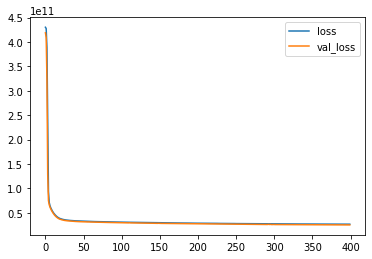

In [104]:
plt.figure(figsize=(10,6))
loss.plot()

     - Here, we see that both the training loss and validation loss are decreasing with same range
     - hence, we say there is no overfitting going in this model
     - If there is a spike in the middle of plot with val_loss, then it means the model is overfitting

Prediction

In [105]:
pred = model.predict(X_test)
pred[:5]

array([[477632.12],
       [601823.  ],
       [556112.6 ],
       [387964.7 ],
       [443566.8 ]], dtype=float32)

In [106]:
y_test[:5]

15832   319000.000
6001    464625.000
4256    489950.000
15849   395000.000
4088    458000.000
Name: price, dtype: float64

In [107]:
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
print(mean_squared_error(y_test,pred))
print(r2_score(y_test,pred))
print(explained_variance_score(y_test,pred))

25312657514.46296
0.8091287740673369
0.8091773729447315


We observe that we have obtained a accuracy of around 80.91%

<h3>Plots of predictions</h3>

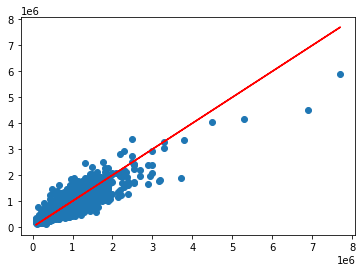

In [111]:
plt.scatter(y_test,pred)
plt.plot(y_test,y_test,'r')

We see that the outliers are effecting the model's performance very much

So, we can train the model with the data which has no outliers in it

In [112]:
model.save('ANN_reg.h5')

An H5 file is a data file saved in the Hierarchical Data Format (HDF). It contains multidimensional arrays of scientific data. H5 files are commonly used in aerospace, physics, engineering, finance, academic research, genomics, astronomy, electronics instruments, and medical fields.